<a href="https://colab.research.google.com/github/majagurdek/Machine-Learning/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X_bc = data_breast_cancer["data"][["mean texture", "mean symmetry"]]
y_bc = data_breast_cancer["target"]
X_bc

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809
...,...,...
564,22.39,0.1726
565,28.25,0.1752
566,28.08,0.1590
567,29.33,0.2397


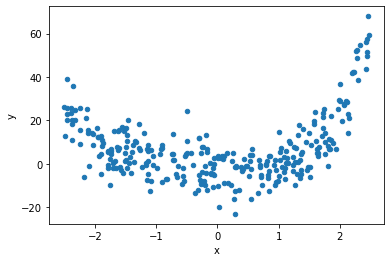

In [ ]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [ ]:
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# f1s = []
# for i in range(1, 20):
#     tree_clf = DecisionTreeClassifier(max_depth=i,random_state=42)
#     tree_clf.fit(X_bc_train, y_bc_train)
#     y_pred_train = tree_clf.predict(X_bc_train)
#     y_pred_test = tree_clf.predict(X_bc_test)
#     f1_train = f1_score(y_bc_train, y_pred_train)
#     f1_test = f1_score(y_bc_test, y_pred_test)
#     f1s.append((i, f1_train, f1_test))
# f1s
# 3 najlepsze

[(1, 0.7741935483870968, 0.7536231884057971),
 (2, 0.8224956063268893, 0.7763157894736842),
 (3, 0.8321917808219177, 0.7974683544303798),
 (4, 0.8265682656826568, 0.7412587412587412),
 (5, 0.8606271777003482, 0.7105263157894737),
 (6, 0.8697247706422019, 0.7482993197278911),
 (7, 0.9068100358422939, 0.7162162162162162),
 (8, 0.9287020109689215, 0.7234042553191488),
 (9, 0.9492753623188406, 0.7310344827586208),
 (10, 0.9656419529837251, 0.6986301369863014),
 (11, 0.9805996472663139, 0.6853146853146853),
 (12, 0.9928825622775801, 0.7172413793103449),
 (13, 1.0, 0.6986301369863014),
 (14, 1.0, 0.6986301369863014),
 (15, 1.0, 0.6986301369863014),
 (16, 1.0, 0.6986301369863014),
 (17, 1.0, 0.6986301369863014),
 (18, 1.0, 0.6986301369863014),
 (19, 1.0, 0.6986301369863014)]

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf.fit(X_bc_train, y_bc_train)
y_pred_train = tree_clf.predict(X_bc_train)
y_pred_test = tree_clf.predict(X_bc_test)
f1_train = f1_score(y_bc_train, y_pred_train)
f1_test = f1_score(y_bc_test, y_pred_test)

In [ ]:
print(f1_train)
print(f1_test)

0.8415672913117547
0.7870967741935484


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
f = "bc"
export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=data_breast_cancer.feature_names[[1, 8]],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer.target),data_breast_cancer.target_names)],
        rounded=True,
        filled=True)
print(f)

bc


In [ ]:
print(graphviz.render('dot', 'png', f))

bc.png


In [ ]:
acc_train = tree_clf.score(X_bc_train, y_bc_train)
acc_test = tree_clf.score(X_bc_test, y_bc_test)

In [ ]:
print(acc_train, acc_test)

0.7956043956043956 0.7105263157894737


In [ ]:
import pickle
f1acc_tree = [tree_clf.get_depth(),f1_train, f1_test,acc_train, acc_test]

In [ ]:
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(f1acc_tree, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('f1acc_tree.pkl', 'rb') as f:
    print(pickle.load(f))

[3, 0.8415672913117547, 0.7870967741935484, 0.7956043956043956, 0.7105263157894737]


In [ ]:
#Regresja

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# res= []
# for i in range(1, 20):
#     tree_reg = DecisionTreeRegressor(max_depth=i,random_state=42)
#     tree_reg.fit(X_train, y_train)
#     y_pred_train = tree_reg.predict(X_train)
#     y_pred_test = tree_reg.predict(X_test)
#     mse_train = mean_squared_error(y_train, y_pred_train)
#     mse_test = mean_squared_error(y_test, y_pred_test)
#     res.append((i, mse_train, mse_test))
# res
# 4 najlepszy

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=4,random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
print(mse_train)
print(mse_test)

47.23311800352414
66.345327258335


In [ ]:
f = "reg"
export_graphviz(
        tree_reg,
        out_file=f,
        rounded=True,
        filled=True)
print(f)

reg


In [ ]:
print(graphviz.render('dot', 'png', f))

reg.png


In [ ]:
mse_tree = [tree_reg.get_depth(),mse_train, mse_test]

In [ ]:
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(mse_tree, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('mse_tree.pkl', 'rb') as f:
    print(pickle.load(f))

[4, 47.23311800352414, 66.345327258335]
